# Visualize 2nd level results on local computer

Separate scripts to look at group level results on local macbook

Read in local folders and packages

**we chose a voxel-wise threshold of *`p<0.005`* and corrected for multiple comparisons with a cluster-wise FDR threshold of *`p<0.05`*.**


In [42]:
from nilearn import plotting
%matplotlib inline
import os
import numpy as np
from nilearn.plotting import plot_glass_brain
from IPython.display import Image
from nilearn.image import threshold_img

In [ ]:
os.getcwd()

## Contrast list

- cont01 = con_0001 = NoGo > Go
- cont02 = con_0002 = Face > Control
- cont03 = con_0003 = Sad > Neutral
- cont04 = con_0004 = Happy > Neutral
- cont05 = con_0005 = Sad > Happy
- cont06 = con_0006 = Happy > Sad
- cont07 = con_0007 = Sad > Control
- cont08 = con_0008 = Sad NoGo > Sad Go

In [ ]:
# Set paths and directories
img_dir = '/Users/stepheniuh/ownCloud/PhD/RED/2ndlevel_output/2ndLevel'
nomask_img_dir = '/Users/stepheniuh/ownCloud/PhD/RED/2ndlevel_output_nomask/2ndLevel'
thresh_img_dir = '/Users/stepheniuh/ownCloud/PhD/RED/2ndlevel_output_thresh/2ndLevel'
anatimg = '/Users/stepheniuh/ownCloud/PhD/RED/Standard masks/MNI152_T1_2mm_brain.nii.gz'

/usr/local/anaconda3/envs/redEnv/lib/python3.8/site-packages/nilearn/plotting/html_document.py:56: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  warnings.warn('It seems you have created more than {} '



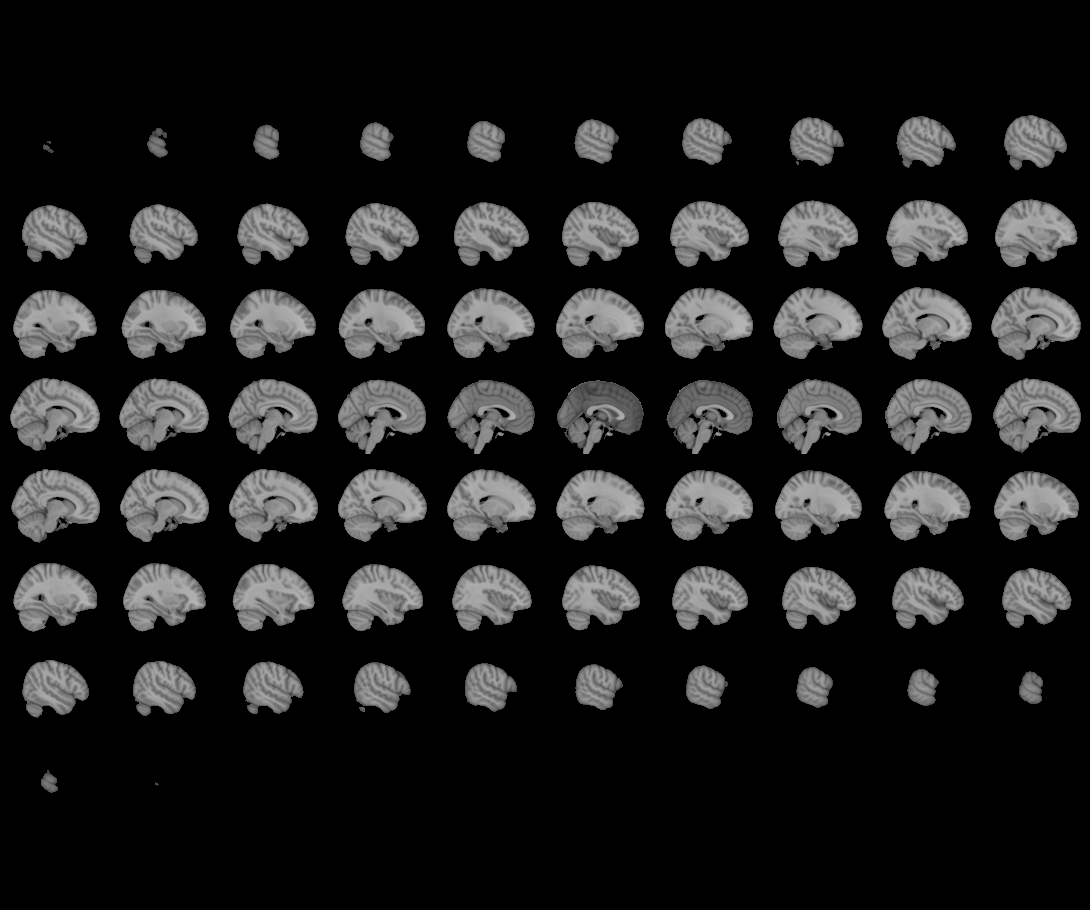
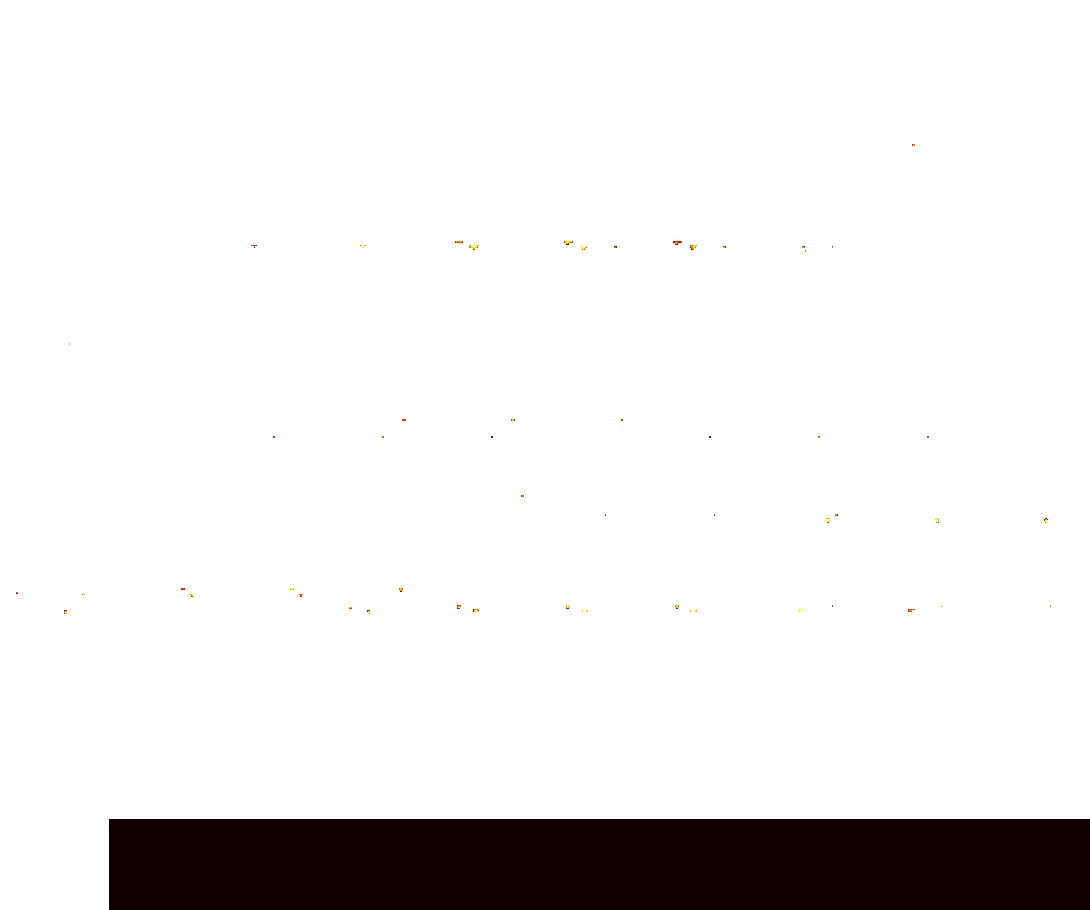

In [112]:
# No mask
view = plotting.view_img(nomask_img_dir + '/con_0002/spmT_0001_thr.nii', bg_img = anatimg,
                         threshold = 0, title='Faces > Control')
view

/usr/local/anaconda3/envs/redEnv/lib/python3.8/site-packages/nilearn/plotting/html_document.py:56: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  warnings.warn('It seems you have created more than {} '



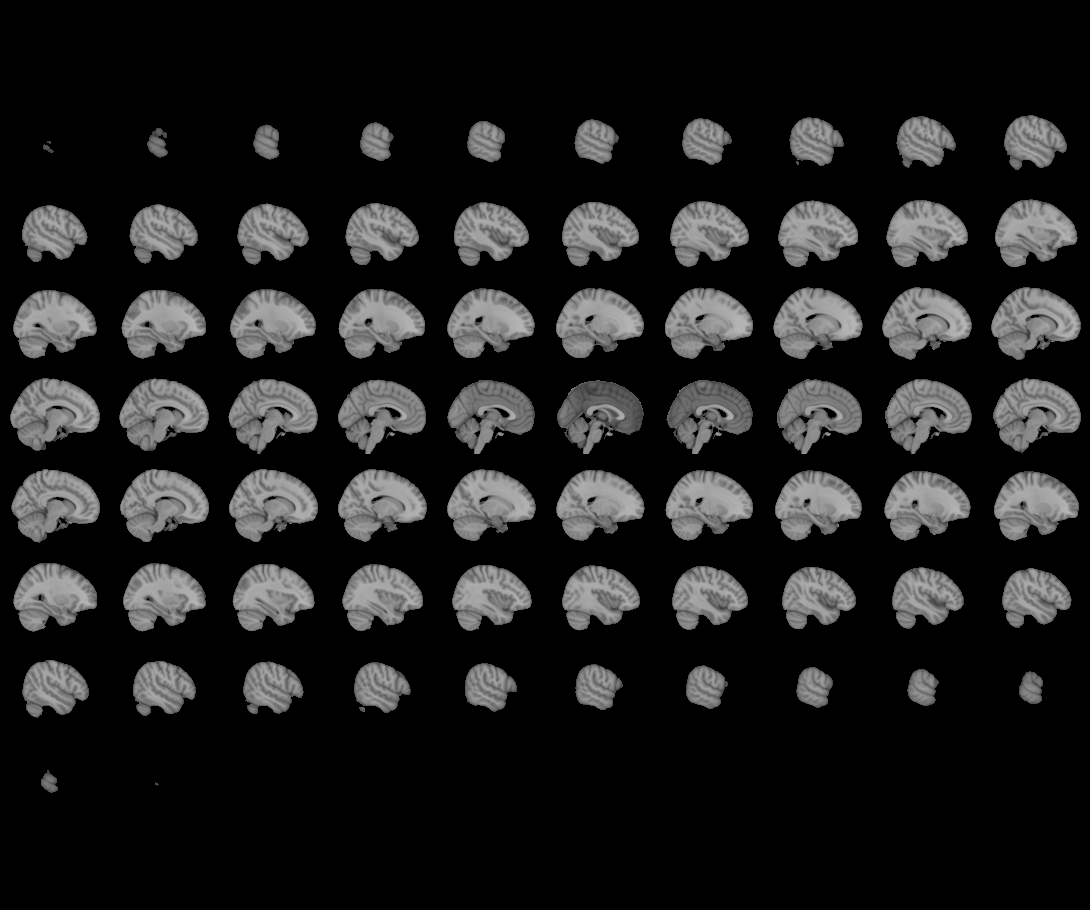
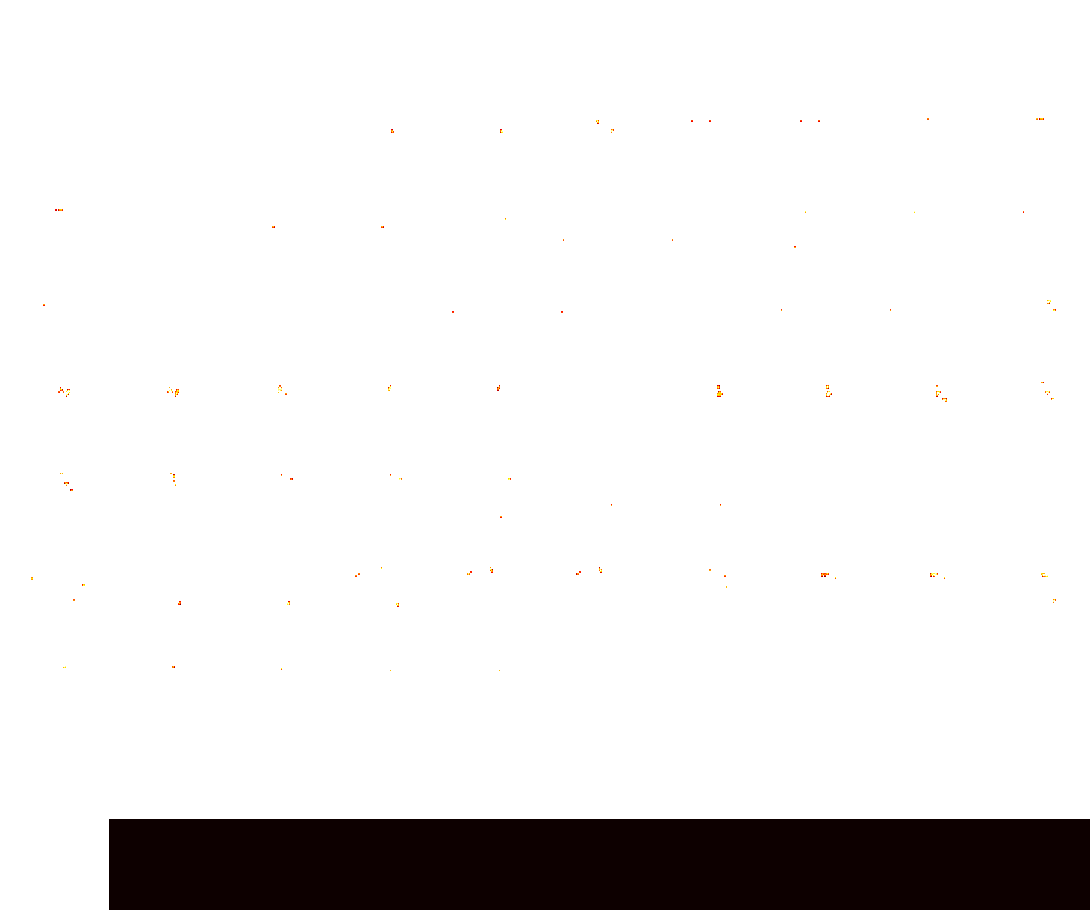

In [37]:
# Mask
view = plotting.view_img(img_dir + '/con_0008/spmT_0001_thr.nii', bg_img = anatimg, cut_coords = (-2, 2, 55),
                         title='Sad NoGo > Sad Go')
view

/usr/local/anaconda3/envs/redEnv/lib/python3.8/site-packages/nilearn/plotting/html_document.py:56: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  warnings.warn('It seems you have created more than {} '



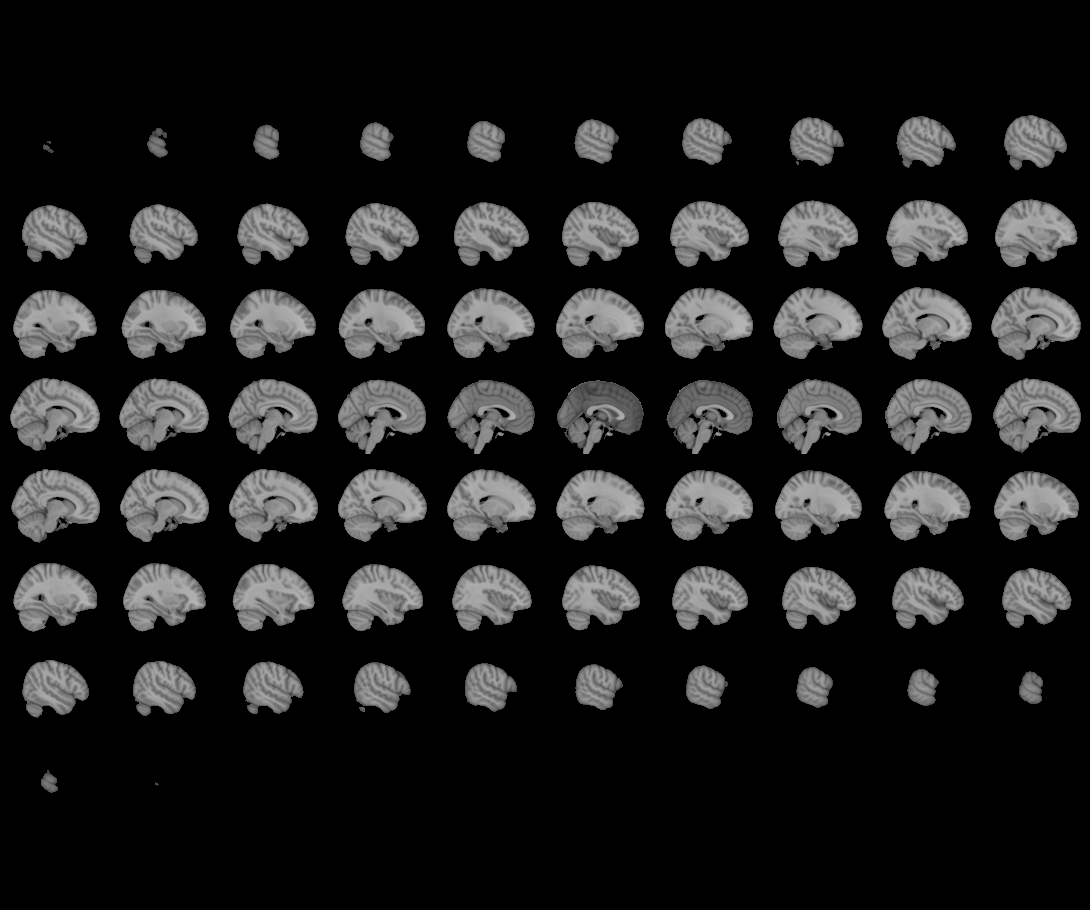
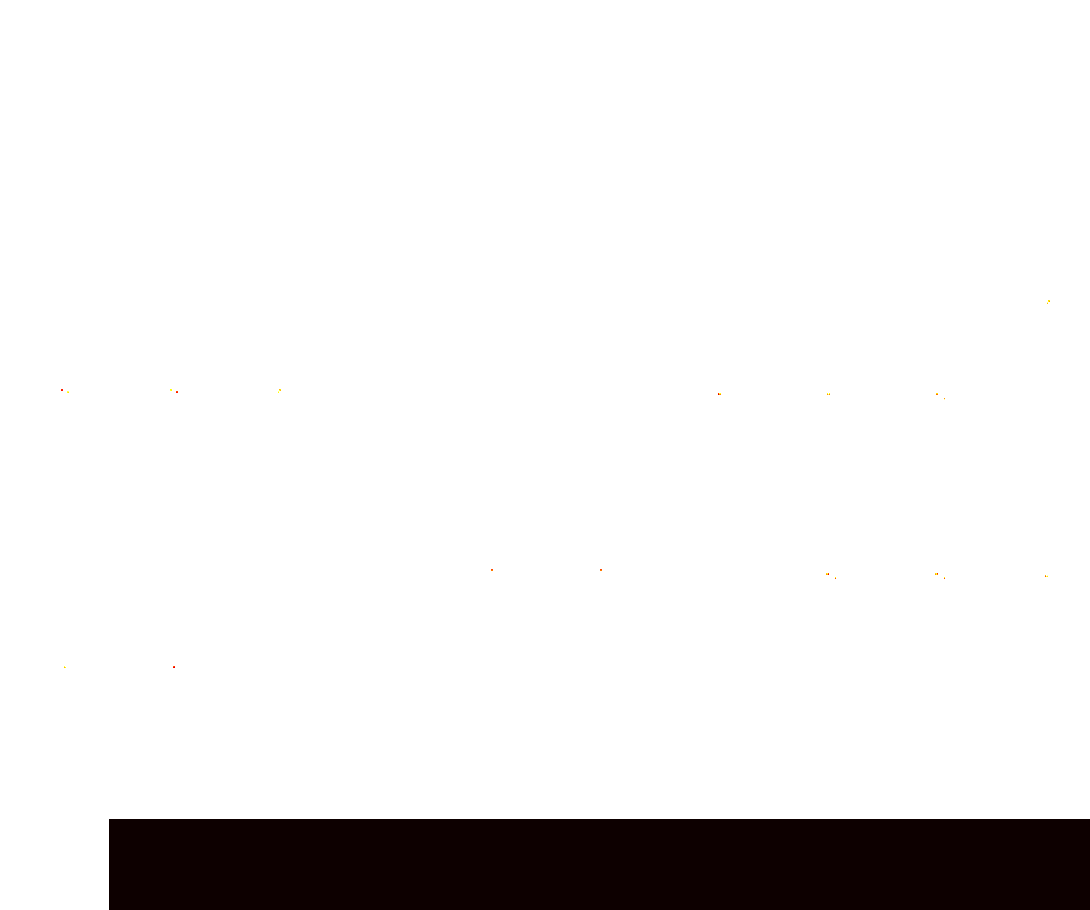

In [38]:
# Threshold at 0.001 + Mask
view = plotting.view_img(thresh_img_dir + '/con_0008/spmT_0001_thr.nii', bg_img = anatimg, cut_coords = (-2, 2, 55),
                         title='Sad NoGo > Sad Go')
view

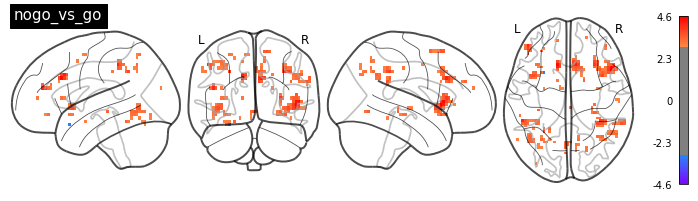

In [53]:
# Try plotting glass brain
plotting.plot_glass_brain(thresh_img_dir + '/con_0001/spmT_0001.nii', threshold = 3,
                         colorbar = True, title = 'nogo_vs_go', plot_abs = False,
                         display_mode = 'lyrz', cmap = 'rainbow')

# AtlasReader

### Pulling in AtlasReader to understand where peaks of clusters are, over which regions the clusters extend, and how big they are
* Citation and references to this package are on the github: https://github.com/miykael/atlasreader

In [41]:
from atlasreader import create_output

The Python package you are importing, AtlasReader, is licensed under the
BSD-3 license; however, the atlases it uses are separately licensed under more
restrictive frameworks.
By using AtlasReader, you agree to abide by the license terms of the
individual atlases. Information on these terms can be found online at:
https://github.com/miykael/atlasreader/tree/master/atlasreader/data



In [110]:
# Output directory (adjust as needed)
output_dir = '/Users/stepheniuh/ownCloud/PhD/RED/2ndlevel_output_thresh/atlasreader_thresh'

In [134]:
# Save stat map as thresholded file (will need to do this for each contrast)
con = '0008'

# Threshold image at value of 3 to create clusters (can adjust this)
stat_img = thresh_img_dir + '/con_%s/spmT_0001_thr.nii'%(con)
stat_img = threshold_img(stat_img, threshold=0) #set threshold = 0 for _thr


# Save thresholded image into a NIfTI file into 1st level output sub folder
file_name = output_dir + '/con_%s/stat_img.nii.gz'%(con)
stat_img.to_filename(file_name)

### Running AtlasReader

Need to provide stat map (file_name or the image object) and cluster extent (specifies minimum number of contiguous voxels required for a cluster to be considered for the analysis, i.e., 5)

In [135]:
create_output(file_name, cluster_extent = 5, direction = 'both')

/usr/local/anaconda3/envs/redEnv/lib/python3.8/site-packages/nilearn/plotting/displays.py:786: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


Output = 4 different kind of files:

1. <b> Overview figure</b>: shows results within the whole brain at once
2. <b> Informative figure for each cluster </b>: shows sagittal, coronal, and transversal plane centered at center of the cluster
3. <b> Peak csv file</b>: contains relevant info about peak of each cluster
4. <b> Cluster csv file</b>: contains relevant info about each cluster

#### 1. Overview figure

Shows all clusters throughout the brain, plotted on a glass brain plot.

The name of the file is the name of the provided statistical image (saved above) but with the file ending `.png`

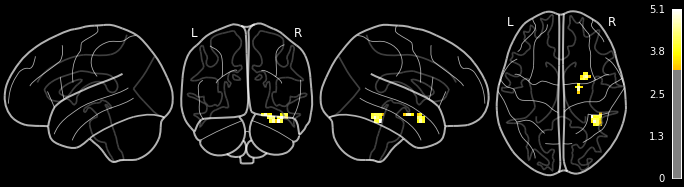

In [152]:
con = '0007'
Image(output_dir + '/con_%s/stat_img.png'%(con))

#### 2. Informative cluster figure

Shows the cluster center in 3 anatomical planes. The name of these files all end in `_cluster##.png`

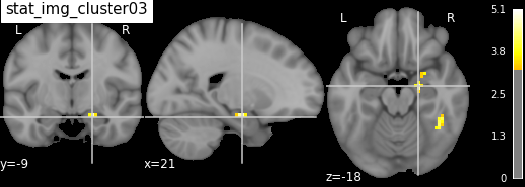

In [157]:
Image(output_dir + '/con_%s/stat_img_cluster03.png'%(con))

#### 3. Peak table

CSV file ending with `_peaks.csv` contains location of each cluster's peak, its signal value at this location, the cluster extent (in mm, NOT in number of voxels), and the atlas correspondence of the peak:

In [154]:
import pandas as pd
pd.read_csv(output_dir + '/con_%s/stat_img_peaks.csv'%(con))

,cluster_id,peak_x,peak_y,peak_z,peak_value,volume_mm,aal,desikan_killiany,harvard_oxford
0,1,36,-42,-25.5,5.05928,877.50,Cerebelum_6_R,Unknown,23.0% Right_Temporal_Occipital_Fusiform_Cortex...
1,2,30,3,-25.5,4.67886,573.75,Amygdala_R,Right-Cerebral-White-Matter,27.0% Right_Amygdala; 19.0% Right_Parahippocam...
2,3,21,-9,-18.0,4.76133,202.50,Hippocampus_R,Right-Hippocampus,53.0% Right_Hippocampus; 38.0% Right_Amygdala


#### 4. Cluster table

CSV file ending with `_cluster.csv` contains location of each cluster's peak, the mean value within the cluster, the cluster extent (in mm, NOT in number of voxels), and membership of each cluster given a particular atlas

In [155]:
pd.read_csv(output_dir + '/con_%s/stat_img_clusters.csv'%(con))

,cluster_id,peak_x,peak_y,peak_z,cluster_mean,volume_mm,aal,desikan_killiany,harvard_oxford
0,1,36,-42,-25.5,3.93138,877.50,61.54% Fusiform_R; 26.92% Temporal_Inf_R; 11.5...,42.31% ctx-rh-fusiform; 26.92% Unknown; 23.08%...,96.15% Right_Temporal_Occipital_Fusiform_Cortex
1,2,30,3,-25.5,3.88216,573.75,52.94% Amygdala_R; 23.53% Temporal_Pole_Sup_R;...,23.53% Right-Amygdala; 23.53% Unknown; 17.65% ...,70.59% Right_Amygdala; 29.41% Right_Temporal_Pole
2,3,21,-9,-18.0,3.97057,202.50,66.67% Hippocampus_R; 33.33% ParaHippocampal_R,83.33% Right-Hippocampus; 16.67% Right-Amygdala,83.33% Right_Hippocampus; 16.67% Right_Amygdala
